In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [3]:
numpy.random.seed(48)

In [4]:
data_raw = read_csv('airline_data.csv', usecols=[1], engine='python', skipfooter=3)

data = data_raw.values.astype("float32")

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [6]:
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [7]:
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [8]:
#[samples, time steps, features]
X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = numpy.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [9]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0413
Epoch 2/100
 - 0s - loss: 0.0202
Epoch 3/100
 - 0s - loss: 0.0146
Epoch 4/100
 - 0s - loss: 0.0131
Epoch 5/100
 - 0s - loss: 0.0121
Epoch 6/100
 - 0s - loss: 0.0111
Epoch 7/100
 - 0s - loss: 0.0102
Epoch 8/100
 - 0s - loss: 0.0093
Epoch 9/100
 - 0s - loss: 0.0081
Epoch 10/100
 - 0s - loss: 0.0071
Epoch 11/100
 - 0s - loss: 0.0062
Epoch 12/100
 - 0s - loss: 0.0053
Epoch 13/100
 - 0s - loss: 0.0045
Epoch 14/100
 - 0s - loss: 0.0038
Epoch 15/100
 - 0s - loss: 0.0033
Epoch 16/100
 - 0s - loss: 0.0029
Epoch 17/100
 - 0s - loss: 0.0026
Epoch 18/100
 - 0s - loss: 0.0024
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0022
Epoch 21/100
 - 0s - loss: 0.0021
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0021
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0020
Epoch 29/100
 - 0s - loss: 0.0020
Epoch 30/100
 - 0s - lo

In [10]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [11]:
pred_train = scaler.inverse_transform(pred_train)
Y_train = scaler.inverse_transform([Y_train])
pred_test = scaler.inverse_transform(pred_test)
Y_test = scaler.inverse_transform([Y_test])

In [12]:
score_train = math.sqrt(mean_squared_error(Y_train[0], pred_train[:,0]))
print('Train Score: %.2f RMSE' % (score_train))
score_test = math.sqrt(mean_squared_error(Y_test[0], pred_test[:,0]))
print('Test Score: %.2f RMSE' % (score_test))

Train Score: 22.92 RMSE
Test Score: 47.53 RMSE


In [13]:
pred_train_plot = numpy.empty_like(data)
pred_train_plot[:, :] = numpy.nan
pred_train_plot[look_back:len(pred_train)+look_back, :] = pred_train

pred_test_plot = numpy.empty_like(data)
pred_test_plot[:, :] = numpy.nan
pred_test_plot[len(pred_train)+(look_back*2)+1:len(data)-1, :] = pred_test

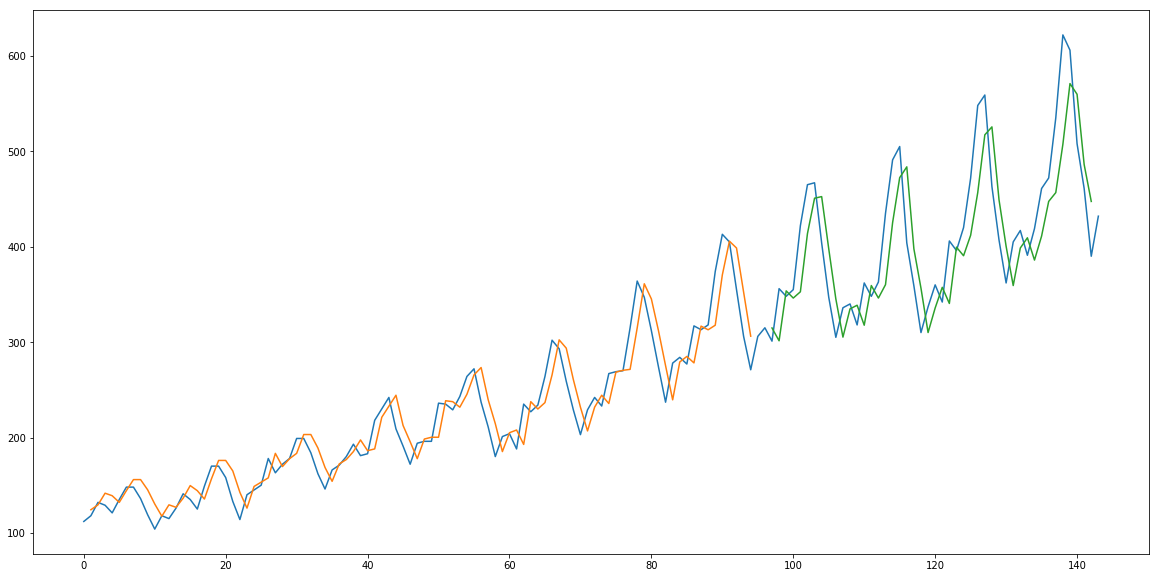

In [14]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(data))
plt.plot(pred_train_plot)
plt.plot(pred_test_plot)
plt.show()